In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AccidentesAviones.csv')
df.head(20)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
5,5,"October 17, 1913",1030,"Near Johannisthal, Germany",Military - German Navy,?,?,Zeppelin L-2 (airship),?,?,28,?,?,28,?,?,0,Hydrogen gas which was being vented was sucked...
6,6,"March 05, 1915",0100,"Tienen, Belgium",Military - German Navy,?,?,Zeppelin L-8 (airship),?,?,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
7,7,"September 03, 1915",1520,"Off Cuxhaven, Germany",Military - German Navy,?,?,Zeppelin L-10 (airship),?,?,19,?,?,19,?,?,0,"Exploded and burned near Neuwerk Island, when..."
8,8,"July 28, 1916",?,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),?,?,20,?,?,20,?,?,0,"Crashed near the Black Sea, cause unknown."
9,9,"September 24, 1916",0100,"Billericay, England",Military - German Navy,?,?,Zeppelin L-32 (airship),?,?,22,?,?,22,?,?,0,Shot down by British aircraft crashing in flames.


In [5]:
print(df.shape)  # Muestra el tamaño del DataFrame (número de filas y columnas)
print(df.head())  # Muestra las primeras filas del DataFrame


(5008, 18)
   Unnamed: 0               fecha HORA declarada  \
0           0  September 17, 1908           1718   
1           1  September 07, 1909              ?   
2           2       July 12, 1912           0630   
3           3     August 06, 1913              ?   
4           4  September 09, 1913           1830   

                                 Ruta                OperadOR flight_no  \
0                 Fort Myer, Virginia    Military - U.S. Army         ?   
1             Juvisy-sur-Orge, France                       ?         ?   
2           Atlantic City, New Jersey    Military - U.S. Navy         ?   
3  Victoria, British Columbia, Canada                 Private         ?   
4                  Over the North Sea  Military - German Navy         ?   

           route                 ac_type registration cn_ln all_aboard  \
0  Demonstration        Wright Flyer III            ?     1          2   
1       Air show          Wright Byplane          SC1     ?          1   
2  

In [6]:
print(df.describe())  # Muestra estadísticas descriptivas de las variables numéricas
print(df.describe(include='object'))  # Muestra estadísticas descriptivas de las variables categóricas


        Unnamed: 0
count  5008.000000
mean   2503.500000
std    1445.829404
min       0.000000
25%    1251.750000
50%    2503.500000
75%    3755.250000
max    5007.000000
                  fecha HORA declarada            Ruta  OperadOR flight_no  \
count              5008           5008            5008      5008      5008   
unique             4577           1217            4125      2268       893   
top     August 31, 1988              ?  Moscow, Russia  Aeroflot         ?   
freq                  4           1504              16       253      3682   

       route       ac_type registration cn_ln all_aboard PASAJEROS A BORDO  \
count   5008          5008         5008  5008       5008              5008   
unique  3839          2469         4701  3908        245               235   
top        ?  Douglas DC-3            ?     ?          3                 0   
freq     762           333          272   667        280               869   

       crew_aboard cantidad de fallecidos passe

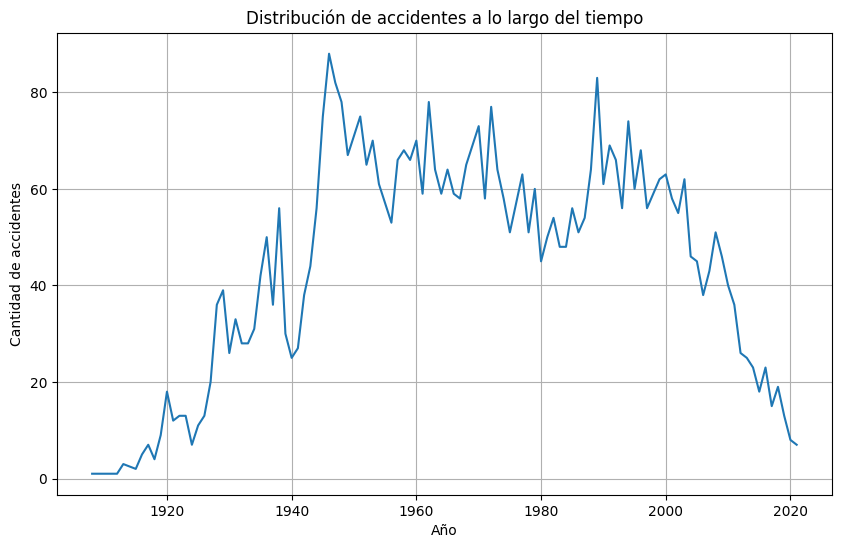

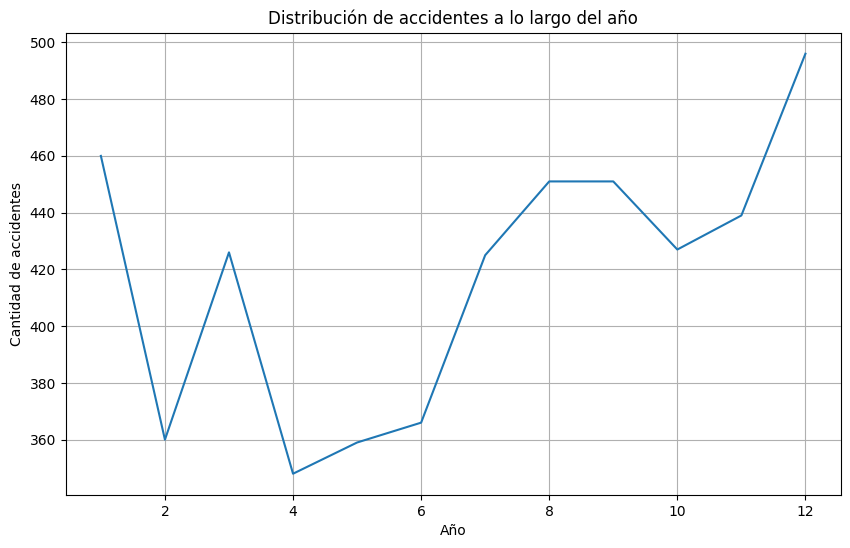

In [6]:
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'fecha' esté en formato de fecha en tu dataframe
# Si no está en formato de fecha, puedes convertirla usando pd.to_datetime()
df['fecha'] = pd.to_datetime(df['fecha'])

# Obtén el recuento de accidentes por año
accidentes_por_año = df['fecha'].dt.year.value_counts().sort_index()

# Crea un gráfico de línea para visualizar los accidentes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(accidentes_por_año.index, accidentes_por_año.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.title('Distribución de accidentes a lo largo del tiempo')
plt.grid(True)
plt.show()

# Obtén el recuento de accidentes por año
accidentes_por_mes = df['fecha'].dt.month.value_counts().sort_index()

# Crea un gráfico de línea para visualizar los accidentes a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(accidentes_por_mes.index, accidentes_por_mes.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.title('Distribución de accidentes a lo largo del año')
plt.grid(True)
plt.show()



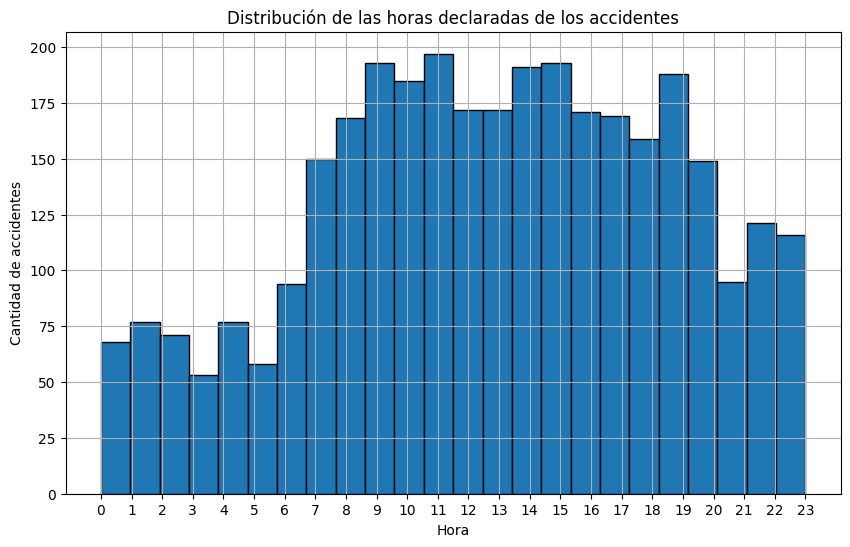

In [8]:
# Reemplazar los valores desconocidos "?" por NaN
df['HORA declarada'] = df['HORA declarada'].replace('?', pd.NA)

# Convertir la columna 'HORA declarada' a formato de hora
df['HORA declarada'] = pd.to_datetime(df['HORA declarada'], format='%H%M', errors='coerce').dt.hour

# Crear un histograma sin tener en cuenta los valores NaN
plt.figure(figsize=(10, 6))
plt.hist(df['HORA declarada'].dropna(), bins=24, edgecolor='black')
plt.xlabel('Hora')
plt.ylabel('Cantidad de accidentes')
plt.title('Distribución de las horas declaradas de los accidentes')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

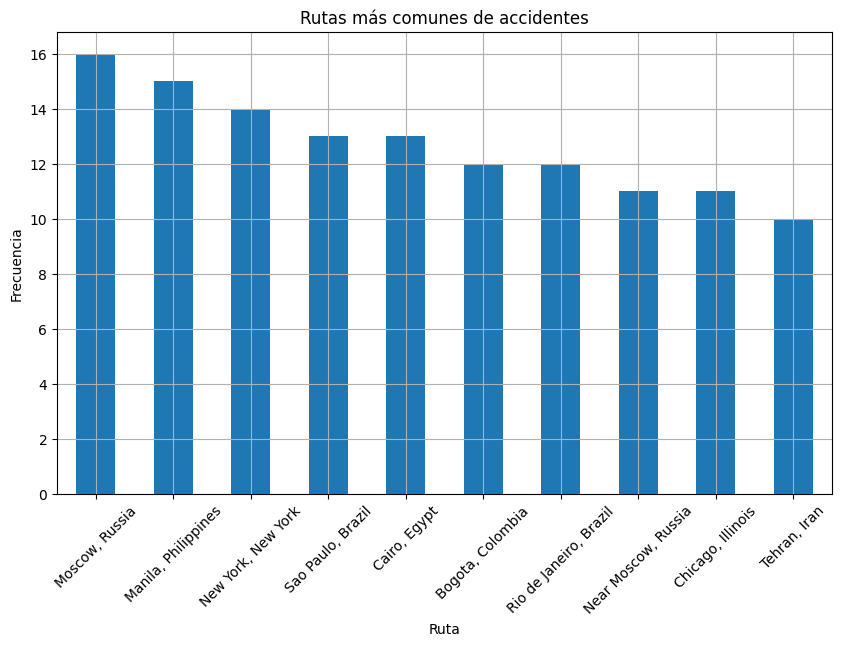

In [9]:
# Obtener la frecuencia de las rutas
ruta_frecuencia = df['Ruta'].value_counts()

# Filtrar las rutas con mayor frecuencia (por ejemplo, las 10 más comunes)
top_rutas = ruta_frecuencia.head(10)

# Crear un gráfico de barras de las rutas más comunes
plt.figure(figsize=(10, 6))
top_rutas.plot(kind='bar')
plt.xlabel('Ruta')
plt.ylabel('Frecuencia')
plt.title('Rutas más comunes de accidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

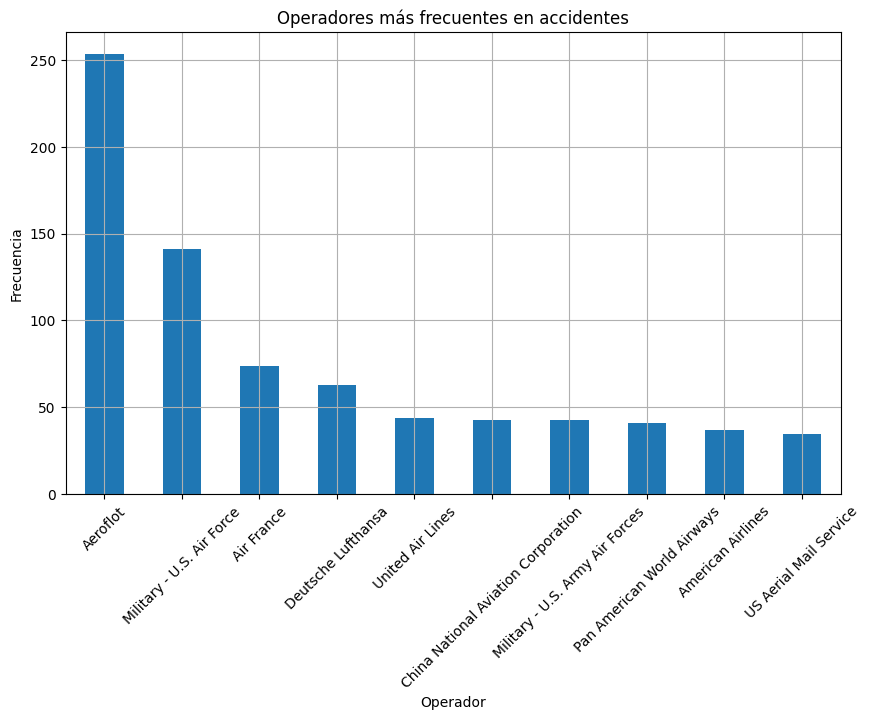

In [11]:
# Obtener la frecuencia de los operadores
operador_frecuencia = df['OperadOR'].value_counts()

# Filtrar los operadores con mayor frecuencia (por ejemplo, los 10 más comunes)
top_operadores = operador_frecuencia.head(10)

# Crear un gráfico de barras de los operadores más comunes
plt.figure(figsize=(10, 6))
top_operadores.plot(kind='bar')
plt.xlabel('Operador')
plt.ylabel('Frecuencia')
plt.title('Operadores más frecuentes en accidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


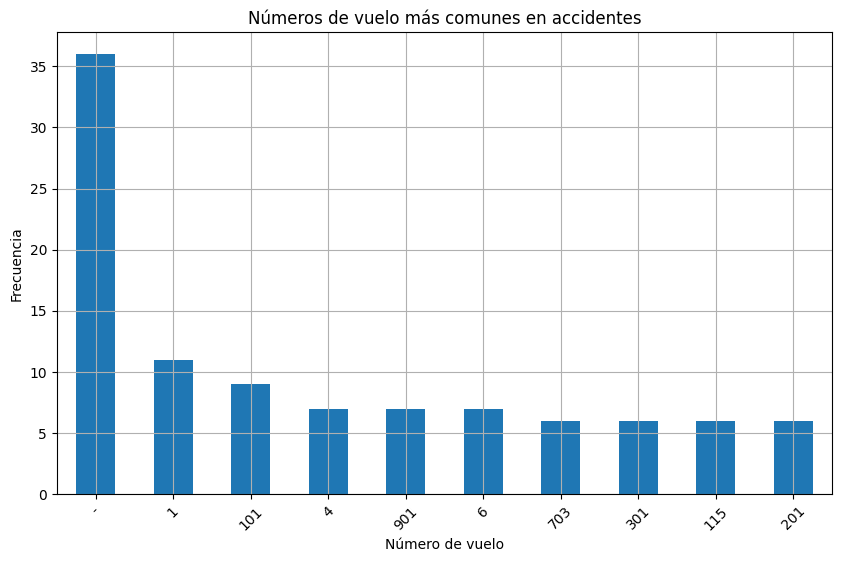

In [13]:
# Reemplazar los valores desconocidos "?" por NaN
df['flight_no'] = df['flight_no'].replace('?', pd.NA)

# Obtener la frecuencia de los números de vuelo
flight_no_frecuencia = df['flight_no'].value_counts().dropna()

# Filtrar los números de vuelo con mayor frecuencia (por ejemplo, los 10 más comunes)
top_flight_no = flight_no_frecuencia.head(10)

# Crear un gráfico de barras de los números de vuelo más comunes
plt.figure(figsize=(10, 6))
top_flight_no.plot(kind='bar')
plt.xlabel('Número de vuelo')
plt.ylabel('Frecuencia')
plt.title('Números de vuelo más comunes en accidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

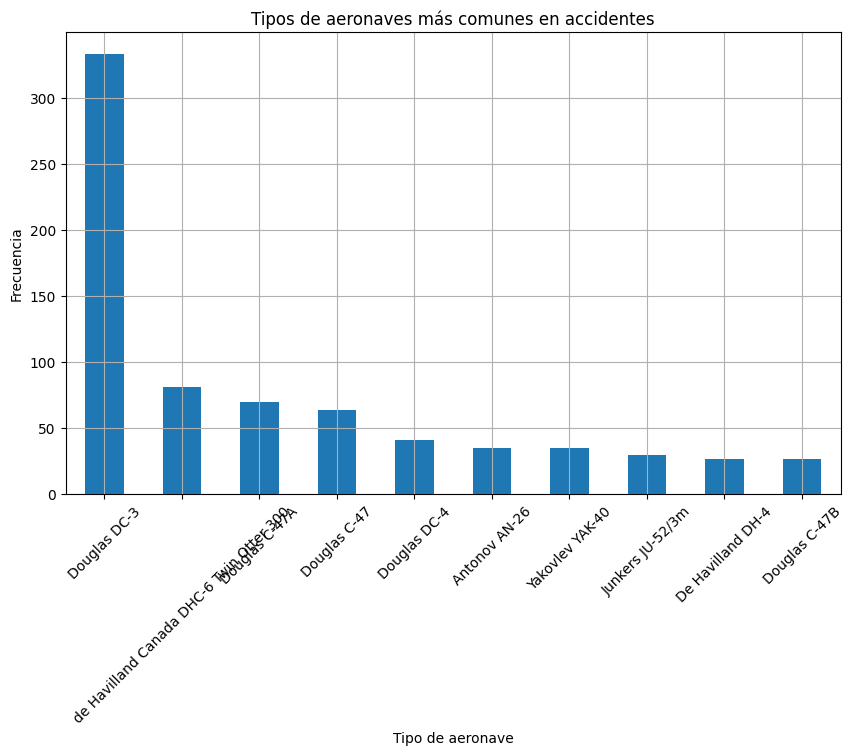

In [19]:
# Convertir la columna 'ac_type' a tipo cadena de texto
df['ac_type'] = df['ac_type'].astype(str)

# Reemplazar '?' por NaN en la columna 'ac_type'
df['ac_type'] = df['ac_type'].replace('?', pd.NA)

# Obtener la frecuencia de los tipos de aeronaves
ac_type_frecuencia = df['ac_type'].value_counts().dropna()

# Filtrar los tipos de aeronaves con mayor frecuencia (por ejemplo, los 10 más comunes)
top_ac_type = ac_type_frecuencia.head(10)

# Crear un gráfico de barras de los tipos de aeronaves más comunes
plt.figure(figsize=(10, 6))
top_ac_type.plot(kind='bar')
plt.xlabel('Tipo de aeronave')
plt.ylabel('Frecuencia')
plt.title('Tipos de aeronaves más comunes en accidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

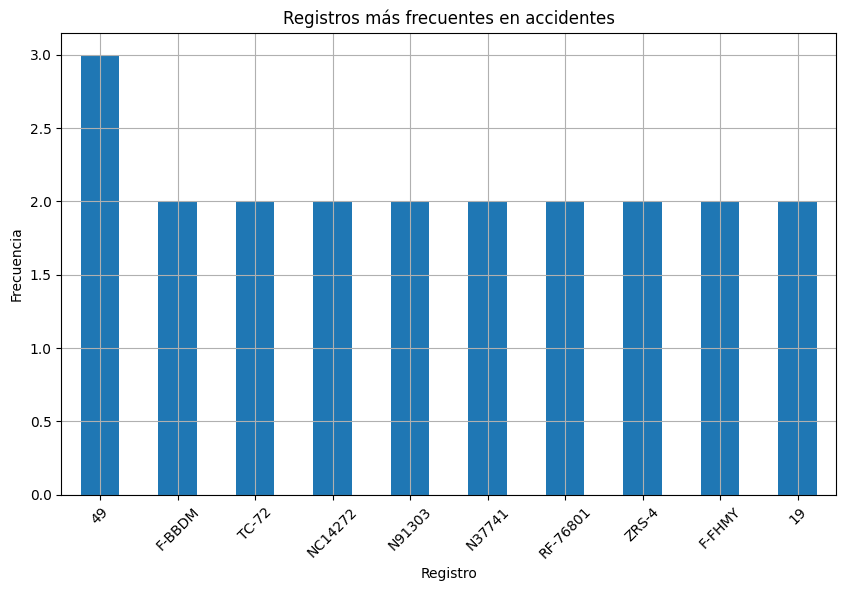

In [21]:
# Convertir la columna 'registration' a tipo cadena de texto
df['registration'] = df['registration'].astype(str)

# Reemplazar '?' por NaN en la columna 'registration'
df['registration'] = df['registration'].replace('?', pd.NA)

# Obtener la frecuencia de los registros
registration_frecuencia = df['registration'].value_counts()

# Filtrar los registros con mayor frecuencia (por ejemplo, los 10 más comunes)
top_registration = registration_frecuencia.head(10)

# Crear un gráfico de barras de los registros más comunes
plt.figure(figsize=(10, 6))
top_registration.plot(kind='bar')
plt.xlabel('Registro')
plt.ylabel('Frecuencia')
plt.title('Registros más frecuentes en accidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<class 'pandas.core.series.Series'>


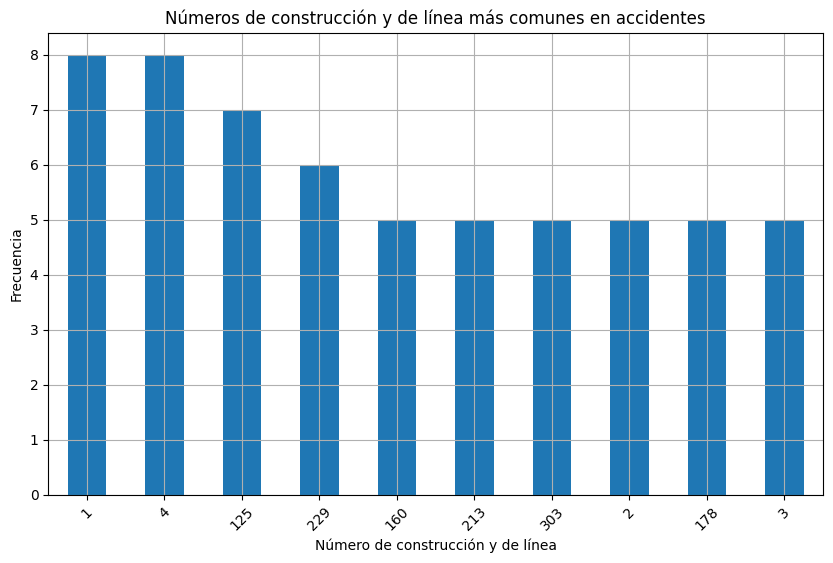

In [34]:
# Convertir la columna 'cn_ln' a tipo cadena de texto
df['cn_ln'] = df['cn_ln'].astype(str)

print(type(df['cn_ln']))

# Reemplazar '?' por NaN en la columna 'cn_ln'
df['cn_ln'] = df['cn_ln'].replace('?', pd.NA)

# Obtener la frecuencia de los números de construcción y de línea
cn_ln_frecuencia = df['cn_ln'].value_counts()

# Filtrar los números de construcción y de línea con mayor frecuencia (por ejemplo, los 10 más comunes)
top_cn_ln = cn_ln_frecuencia.head(10)

# Crear un gráfico de barras de los números de construcción y de línea más comunes
plt.figure(figsize=(10, 6))
top_cn_ln.plot(kind='bar')
plt.xlabel('Número de construcción y de línea')
plt.ylabel('Frecuencia')
plt.title('Números de construcción y de línea más comunes en accidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


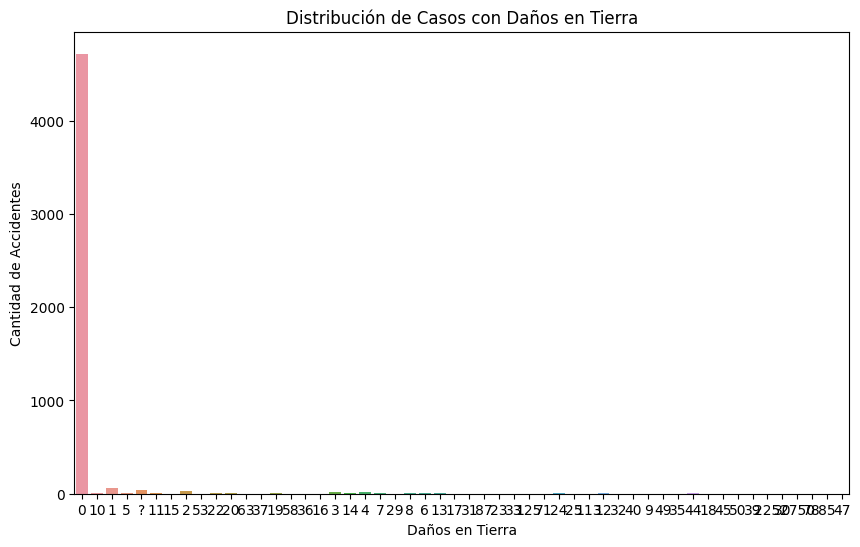

In [31]:
# Análisis univariado de la columna 'ground'
ground_counts = df['ground'].value_counts()

# Graficar la distribución de casos con daños en tierra
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ground')
plt.xlabel('Daños en Tierra')
plt.ylabel('Cantidad de Accidentes')
plt.title('Distribución de Casos con Daños en Tierra')
plt.show()




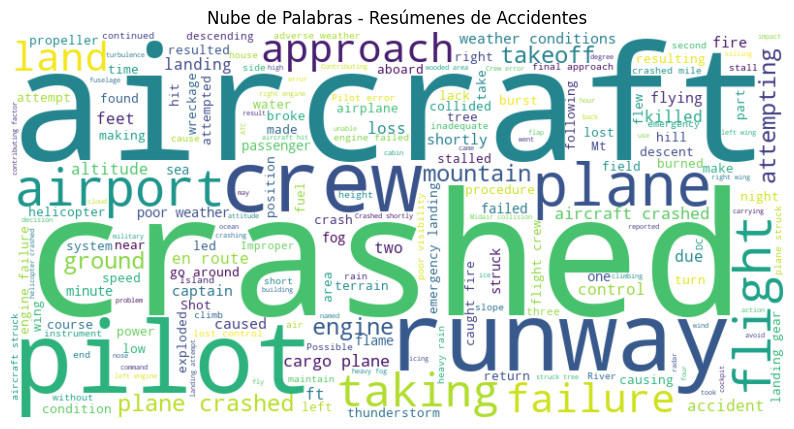

In [30]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar todos los resúmenes en un solo texto
text = ' '.join(df['summary'].dropna().astype(str).tolist())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Resúmenes de Accidentes')
plt.show()

/var/folders/34/0snssvhx7sq50jbvn3vw_0k00000gn/T/ipykernel_51196/2799899361.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


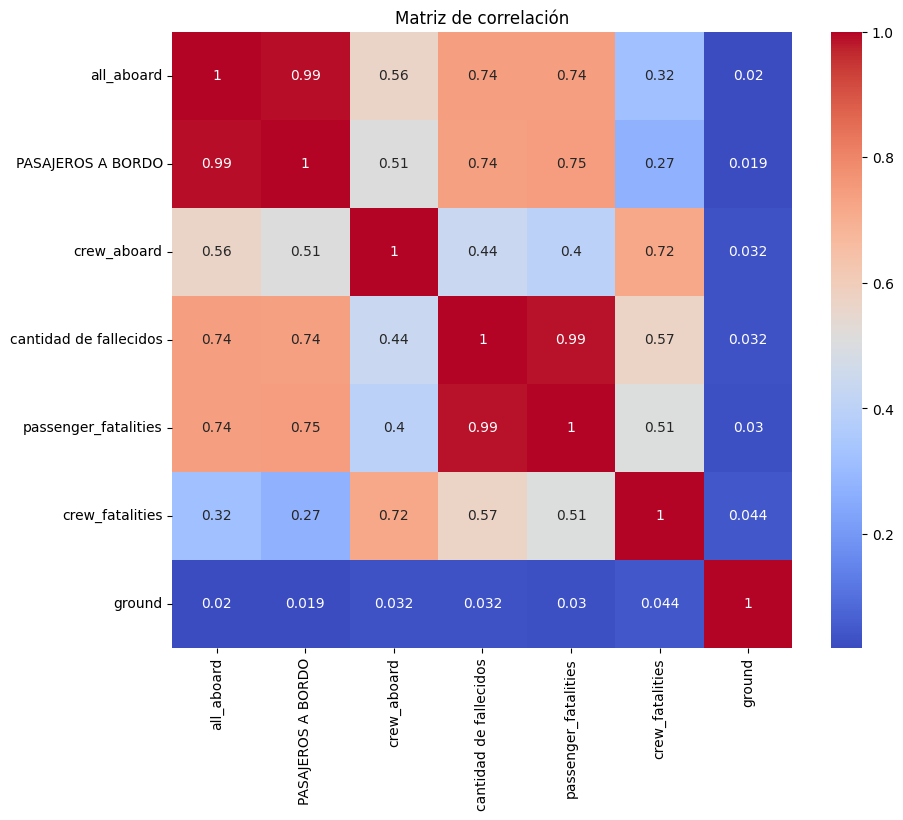

In [54]:
numeric_cols = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']

# Convertir columnas numéricas a tipo string
df[numeric_cols] = df[numeric_cols].astype(str)

# Reemplazar '?' por NaN en las columnas numéricas
df[numeric_cols] = df[numeric_cols].replace('?', np.nan)

# Convertir columnas numéricas a tipo numérico
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Reemplazar valores faltantes con la media de cada columna
df_filled = df.fillna(df.mean())

# Convertir columnas numéricas a tipo int
df_filled[numeric_cols] = df_filled[numeric_cols].astype(int)

# Calcular la matriz de correlación en el DataFrame con valores faltantes reemplazados
corr_matrix = df_filled[numeric_cols].corr()

# Mostrar la matriz de correlación en un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [66]:
# Extraer el año del accidente a partir de la columna de fecha
df['Year'] = pd.to_datetime(df['fecha']).dt.year

mortality_rate_by_year = df.groupby('Year').apply(lambda x: (x['cantidad de fallecidos'].sum() / x['all_aboard'].sum()) * 100)
mortality_rate_by_year = mortality_rate_by_year.reset_index(name='Mortality_Rate')

# Agregar columna con la tasa de cambio anual
mortality_rate_by_year['Rate_of_Change'] = mortality_rate_by_year['Mortality_Rate'].pct_change() * 100

mortality_rate_by_year.tail(40)





,Year,Mortality_Rate,Rate_of_Change
71,1982,50.772889,-34.708151
72,1983,67.588591,33.119450
73,1984,66.787527,-1.185206
74,1985,76.468851,14.495707
75,1986,57.747637,-24.482145
76,1987,82.175227,42.300588
77,1988,66.224038,-19.411189
78,1989,62.096094,-6.233301
79,1990,51.043557,-17.799086
80,1991,73.812580,44.607046
